In [4]:
pwd

'/content'

In [5]:
ls

sample_data/


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [8]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
   creating: TRAIN_SET/APPLES/
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APPLES/116_100.jpg  
  inflating: TRAIN_SET/APPL

In [9]:
pwd

'/content/drive/MyDrive'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
pwd

'/content/drive/MyDrive'

In [16]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/TRAIN_SET",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 2626 images belonging to 5 classes.


In [17]:
x_test=test_datagen.flow_from_directory(r"//content/drive/MyDrive/TRAIN_SET",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 2626 images belonging to 5 classes.


In [18]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

CNN 

3.CREATE MODEL

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dense

In [20]:
model=Sequential()

4. Add Layers(Convolution, MaxPooling, Flatten)

In [21]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [25]:
32*(3*3*3+1)

896

Dense - (Hidden Layers)

In [26]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

OUTPUT LAYERS

In [27]:
model.add(Dense(5,activation='softmax'))

5. Compile the model

In [28]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [29]:
len(x_train)

110

In [30]:
4317/24

179.875

6. Fit the Model

In [31]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
110/110 [==============================] - 32s 282ms/step - loss: 0.3936 - accuracy: 0.8976 - val_loss: 0.0209 - val_accuracy: 0.9950
Epoch 2/5
110/110 [==============================] - 28s 257ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/5
110/110 [==============================] - 31s 282ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1205e-04 - val_accuracy: 1.0000
Epoch 4/5
110/110 [==============================] - 29s 261ms/step - loss: 3.7335e-04 - accuracy: 1.0000 - val_loss: 2.0976e-04 - val_accuracy: 1.0000
Epoch 5/5
110/110 [==============================] - 31s 285ms/step - loss: 2.3700e-04 - accuracy: 1.0000 - val_loss: 1.4766e-04 - val_accuracy: 1.0000


7.SAVE THE MODEL

In [35]:
model.save('TRAIN_SET.h5')

In [36]:
ls TRAIN_SET/

APPLES/  BANANA/  ORANGE/  PINEAPPLE/  WATERMELON/


8.TEST THE MODEL

In [37]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [38]:
#load the model
model=load_model('TRAIN_SET.h5')

In [44]:
img=image.load_img(r"/content/drive/My Drive/TRAIN_SET/WATERMELON/r_26_100.jpg")

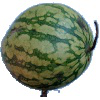

In [45]:
img

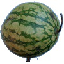

In [47]:
img=image.load_img(r"/content/drive/My Drive/TRAIN_SET/WATERMELON/r_26_100.jpg", target_size=(64,64))
img

In [48]:
x=image.img_to_array(img)

In [49]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [50]:
x=np.expand_dims(x,axis=0)

In [51]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [52]:
y=np.argmax(model.predict(x),axis=0)

1/1 [==============================] - 0s 127ms/step


In [53]:
y

array([0, 0, 0, 0, 0])

In [54]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [55]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE']

In [56]:
index[y[0]]

'APPLES'

In [57]:
img=image.load_img(r"/content/drive/My Drive/TRAIN_SET/APPLES/4_100.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['APPLES','BANANA','ORANGE','PINEAPPLE']
index[y[0]]

1/1 [==============================] - 0s 28ms/step


'APPLES'

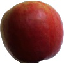

In [58]:
img

In [59]:
img=image.load_img(r"/content/drive/MyDrive/TRAIN_SET/BANANA/1_100.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['APPLES','BANANA','ORANGE','PINEAPPLE']
index[y[0]]

1/1 [==============================] - 0s 28ms/step


'BANANA'

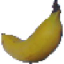

In [60]:
img

In [61]:
img=image.load_img(r"/content/drive/MyDrive/TRAIN_SET/ORANGE/0_100.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=0)
index=['APPLES','BANANA','ORANGE','PINEAPPLE']
index[y[0]]

1/1 [==============================] - 0s 25ms/step


'APPLES'

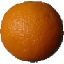

In [62]:
img